<a href="https://colab.research.google.com/github/C4rohan/multivariate-weather-data-clustering/blob/main/day%26_month_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cftime
!pip install utils
!pip install netCDF4 
!pip install scipy
!pip install "xarray[io]"
!pip install geopandas


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import time 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
from PIL import Image
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point
from sklearn.cluster import KMeans, MiniBatchKMeans
import netCDF4
import netCDF4 as nc
import xarray as xr
import datetime
import datetime as dt
from netCDF4 import date2num,num2date
import cftime
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time


%matplotlib inline

In [ ]:
import xarray as xr
#ds = xr.open_dataset('mock.nc', decode_times=False)
ds = xr.open_dataset('mock.nc')
df = ds.to_dataframe()
ds

In [20]:
D1 = ds.sel(time=slice('2021-01-01','2021-01-31')).to_dataframe().reset_index()

#D1.loc[:, 't2m'] = D1.loc[:, 't2m'].fillna(0)
#D1.loc[:, 't2m'] = D1.loc[:, 't2m']
D1

,time,longitude,latitude,sp,sst,u10,v10,sshf,slhf,t2m
0,2021-01-01,-33.0,43.00,102443.676498,290.120809,-4.228059,6.211163,-54768.985283,-366915.151420,288.584571
1,2021-01-01,-33.0,42.75,102431.303226,290.198989,-4.576805,6.044397,-58761.417840,-377165.066486,288.613673
2,2021-01-01,-33.0,42.50,102417.453815,290.163838,-4.906288,5.802354,-57550.053178,-371312.809607,288.611921
3,2021-01-01,-33.0,42.25,102405.135686,289.908009,-5.190528,5.499212,-46510.295414,-341469.980193,288.590937
4,2021-01-01,-33.0,42.00,102391.629859,289.776023,-5.454725,5.185138,-41360.587035,-323312.525079,288.588804
...,...,...,...,...,...,...,...,...,...,...
52106,2021-01-31,-23.0,34.00,102782.514119,291.791562,2.877457,2.493984,-13704.286656,-178663.874506,290.862100
52107,2021-01-31,-23.0,33.75,102792.376257,291.705895,2.248105,1.833995,-10132.169466,-145271.412052,290.856430
52108,2021-01-31,-23.0,33.50,102793.385800,291.676559,1.596435,1.283185,-8004.675063,-114917.706377,290.886935
52109,2021-01-31,-23.0,33.25,102797.504569,291.730881,1.031417,0.909598,-7416.458920,-94454.682893,290.951796


In [6]:
del D1['sp']
del D1['u10']
del D1['sshf']
del D1['slhf']
del D1['sst']
del D1['time']

In [ ]:
D1

In [7]:
D1.describe()

,longitude,latitude,v10,t2m
count,52111.000000,52111.000000,52111.000000,52111.000000
mean,-28.000000,38.000000,4.837016,289.773325
std,2.958068,2.958068,4.959733,1.687238
min,-33.000000,33.000000,-12.463529,284.019813
25%,-30.500000,35.500000,2.609171,288.620437
50%,-28.000000,38.000000,5.798155,289.869129
75%,-25.500000,40.500000,8.208122,291.053796
max,-23.000000,43.000000,14.775525,293.528635


In [40]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(D1)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,5.211100e+04,5.211100e+04,5.211100e+04,5.211100e+04
mean,1.308977e-17,5.010928e-18,1.308977e-17,-2.991885e-14
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.690309e+00,-1.690309e+00,-3.488235e+00,-3.410051e+00
25%,-8.451543e-01,-8.451543e-01,-4.491909e-01,-6.833054e-01
50%,0.000000e+00,0.000000e+00,1.937904e-01,5.678200e-02
75%,8.451543e-01,8.451543e-01,6.797017e-01,7.589229e-01
max,1.690309e+00,1.690309e+00,2.003859e+00,2.225736e+00


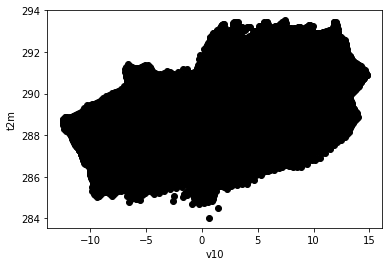

In [10]:
X = D1[["v10","t2m"]]
#Visualise data points
plt.scatter(X["v10"],X["t2m"],c='black')
plt.xlabel('v10')
plt.ylabel('t2m')
plt.show()

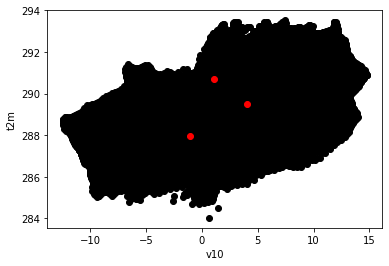

In [11]:

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["v10"],X["t2m"],c='black')
plt.scatter(Centroids["v10"],Centroids["t2m"],c='red')
plt.xlabel('v10')
plt.ylabel('t2m')
plt.show()

In [12]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["v10"]-row_d["v10"])**2
            d2=(row_c["t2m"]-row_d["t2m"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["t2m","v10"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['v10'] - Centroids['v10']).sum() + (Centroids_new['t2m'] - Centroids['t2m']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["v10","t2m"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.6329935354272256
0.34071461893028987
0.4697706800244599
0.38409010331309545
0.29068134617950836
0.22477369544000547
0.16434908466893372
0.1181530409422411
0.08019601538159238
0.05245836879257304
0.037592252173155316
0.024691314091373595
0.01463350855630674
0.008208912287920533
0.008037973061020054
0.006978807318958502
0.006085307758001868
0.002846733015509084
0.00237028703763853
0.0007824473732207515
0.0007607840994103832
0.0007972781906975257
0.0002602566322642552
0.0002676112400767927
0.0


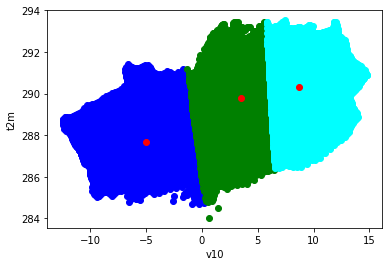

In [13]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["v10"],data["t2m"],c=color[k])
plt.scatter(Centroids["v10"],Centroids["t2m"],c='red')
plt.xlabel('v10')
plt.ylabel('t2m')
plt.show()

In [21]:
D2 = ds.sel(time=slice('2021-01-01')).to_dataframe().reset_index()

#D1.loc[:, 't2m'] = D1.loc[:, 't2m'].fillna(0)
#D1.loc[:, 't2m'] = D1.loc[:, 't2m']
D2

,time,longitude,latitude,sp,sst,u10,v10,sshf,slhf,t2m
0,2021-01-01,-33.0,43.00,102443.676498,290.120809,-4.228059,6.211163,-54768.985283,-366915.151420,288.584571
1,2021-01-01,-33.0,42.75,102431.303226,290.198989,-4.576805,6.044397,-58761.417840,-377165.066486,288.613673
2,2021-01-01,-33.0,42.50,102417.453815,290.163838,-4.906288,5.802354,-57550.053178,-371312.809607,288.611921
3,2021-01-01,-33.0,42.25,102405.135686,289.908009,-5.190528,5.499212,-46510.295414,-341469.980193,288.590937
4,2021-01-01,-33.0,42.00,102391.629859,289.776023,-5.454725,5.185138,-41360.587035,-323312.525079,288.588804
...,...,...,...,...,...,...,...,...,...,...
1676,2021-01-01,-23.0,34.00,102353.589576,292.353764,-7.728350,2.564034,-62447.346966,-562346.669037,290.716088
1677,2021-01-01,-23.0,33.75,102333.793190,292.406358,-7.906731,2.693861,-60710.869809,-553972.420704,290.867770
1678,2021-01-01,-23.0,33.50,102308.592775,292.468126,-8.019366,2.897065,-60308.584056,-532369.863428,291.004767
1679,2021-01-01,-23.0,33.25,102288.876982,292.535987,-7.951139,3.187480,-60040.393554,-490759.212824,291.069088


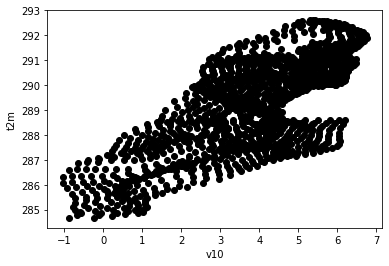

In [16]:
X = D2[["v10","t2m"]]
#Visualise data points
plt.scatter(X["v10"],X["t2m"],c='black')
plt.xlabel('v10')
plt.ylabel('t2m')
plt.show()

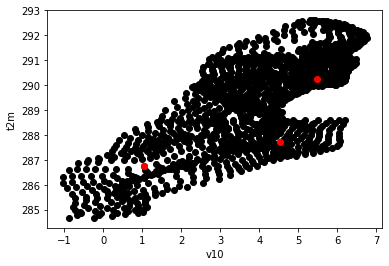

In [17]:

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["v10"],X["t2m"],c='black')
plt.scatter(Centroids["v10"],Centroids["t2m"],c='red')
plt.xlabel('v10')
plt.ylabel('t2m')
plt.show()

In [18]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["v10"]-row_d["v10"])**2
            d2=(row_c["t2m"]-row_d["t2m"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["t2m","v10"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['v10'] - Centroids['v10']).sum() + (Centroids_new['t2m'] - Centroids['t2m']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["v10","t2m"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.07628099944974975
0.06874636712283655
0.03638092119924985
0.03724922546358567
0.021122793962464304
0.016017579980105445
0.016074923161452315
0.0


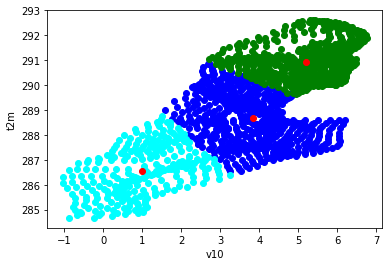

In [19]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["v10"],data["t2m"],c=color[k])
plt.scatter(Centroids["v10"],Centroids["t2m"],c='red')
plt.xlabel('v10')
plt.ylabel('t2m')
plt.show()